## Linear Regression

Basic technique to fit a linear function to some data while minimizing the mean square error

https://aman.ai/cs229/linear-regression/

In [1]:
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [5]:
#Download basic dataset
# api.dataset_download_files('andonians/random-linear-regression')

In [7]:
# from zipfile import ZipFile
# zf = ZipFile('random-linear-regression.zip')
# zf.extractall() 
# zf.close()

In [3]:
data = pd.read_csv('train.csv')
data.dropna(inplace=True)
data.head()
np_data = data.to_numpy()

<AxesSubplot:xlabel='x', ylabel='y'>

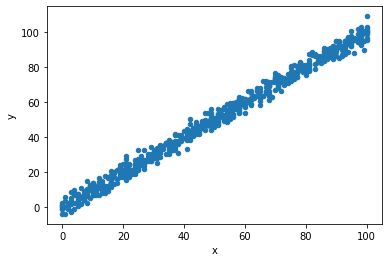

In [4]:
data.plot(x ='x', y='y', kind = 'scatter')

Linear Regression packages

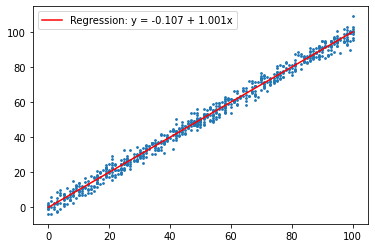

In [5]:
from turtle import color
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# X should be (n_samples, n_features), Y should be 
reg = LinearRegression().fit(np_data[:, 0].reshape(-1, 1), np_data[:, 1])
X = np.linspace(0, 100, 100).reshape(-1, 1)
Y = reg.predict(X)

plt.scatter(np_data[:, 0], np_data[:, 1], s=3)
plt.plot(X, Y, color='r', label=f"Regression: y = {round(reg.intercept_, 3)} + {round(reg.coef_[0], 3)}x")
plt.legend()

linear function with gaussian noise

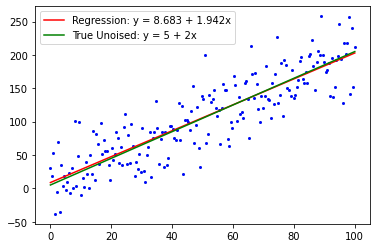

In [6]:

linear_func = lambda X, m, b: m * X + b + np.random.normal(size=X.shape, scale=30)
m, b = 2, 5
x = np.linspace(0, 100, 200)
y = linear_func(x, m, b)
plt.scatter(x, y, s=3)

reg = LinearRegression().fit(x.reshape(-1, 1), y)
X = np.linspace(0, 100, 100).reshape(-1, 1)
Y = reg.predict(X)

X_true = np.linspace(0, 100, 200)
Y_true =  m * X_true + b

plt.scatter(x,y, s=3, color='b')
plt.plot(X, Y, color='r', label=f"Regression: y = {round(reg.intercept_, 3)} + {round(reg.coef_[0], 3)}x")
plt.plot(X_true, Y_true, color='g', label=f"True Unoised: y = {round(b, 3)} + {round(m, 3)}x")
plt.legend()

linear regression on nonlinear data

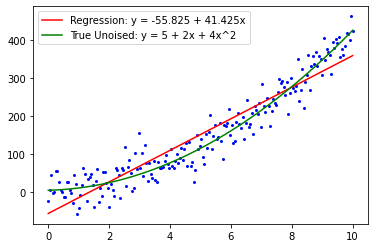

In [7]:
poly_func = lambda X, a1, a2, b: a2*X*X + a1 * X + b + np.random.normal(size=X.shape, scale=30)
a1, a2, b = 2, 4, 5
x = np.linspace(0, 10, 200)
y = poly_func(x, a1, a2, b)
plt.scatter(x, y, s=3)

reg = LinearRegression().fit(x.reshape(-1, 1), y)
X = np.linspace(0, 10, 100).reshape(-1, 1)
Y = reg.predict(X)

X_true = np.linspace(0, 10, 200)
Y_true =  a2*X_true*X_true + a1 * X_true + b

plt.scatter(x,y, s=3, color='b')
plt.plot(X, Y, color='r', label=f"Regression: y = {round(reg.intercept_, 3)} + {round(reg.coef_[0], 3)}x")
plt.plot(X_true, Y_true, color='g', label=f"True Unoised: y = {round(b, 3)} + {round(a1, 3)}x + {round(a2, 3)}x^2")
plt.legend()

Linear Regression with intercept 0 is just an orthogonal projection

https://medium.com/@vladimirmikulik/why-linear-regression-is-a-projection-407d89fd9e3a

Si $x, y \in \mathcal{R}^n$ son nuestros vectores de entrada. La regresión lineal busca encontrar una constante $C$ para minimizar el mean square error entre los datos de entrada y la función lineal $C \cdot x$: $$ MSE(C\cdot x, y) = \frac{1}{n} \sum_i (C\cdot x_i - y_i)^2$$

$$ LinRegr(x, y) = argmin_C MSE(C\cdot x, y)$$

Pero note que el MSE es simplemente una función sobre la norma L-2 de la diferencia entre los vectores, i.e

$$ MSE(x, y) = n \cdot ||x - y||_2^2$$

Y por monotonía del cuadrado y la multiplicación por $n$, minimizar el MSE es lo mismo que calcular:

$$LinRegr(x, y) = argmin_C ||C \cdot x - y ||_2$$

Pero sabemos que hallar dicho $C$ es exactamente lo mismo que projectar ortogonalmente $y$ en $span(x)$. Es decir, 
$$
\hat{x} = argmin_{\hat{x} \in span(x)} ||\hat{x} - y ||_2  = LinRegr(x, y) \cdot x
$$ 
Más aún,

$$ \hat{x}  = proj_{x}y = (x \cdot (x^T \cdot x)^{-1} \cdot x^T)y$$


C:\Users\diego\AppData\Local\Temp\ipykernel_11964\178228154.py:8: RuntimeWarning: invalid value encountered in true_divide
  c = (Y / v)[-1, 0]


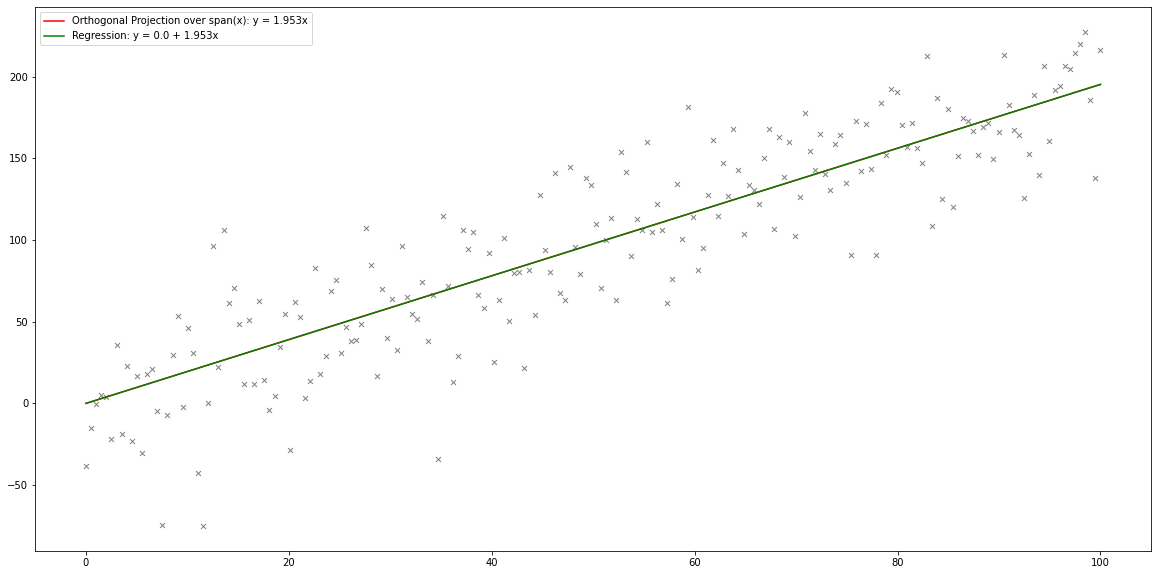

In [26]:
m, b = 2, 0
x = np.linspace(0, 100, 200)
y = linear_func(x, m, b)

v = x.reshape(-1, 1)
P = v @ np.linalg.inv(v.T @ v) @ v.T  #Projection Matrix over the space generated by x
Y = P @ y.reshape(-1, 1) #Orthogonally project Y on span(x)
c = (Y / v)[-1, 0]

reg = LinearRegression(fit_intercept=False).fit(v, y)
Y_reg = reg.predict(v)

plt.figure(figsize=(20,10))
plt.scatter(x,y, s=25, color='gray', marker="x", linewidths=1)
plt.plot(x, Y, color='r', label=f"Orthogonal Projection over span(x): y = {round(c, 3)}x")
plt.plot(x, Y_reg, color='g', label=f"Regression: y = {round(reg.intercept_, 3)} + {round(reg.coef_[0], 3)}x")
plt.legend()

### Using Linear Regression (With projections) to Fit a curve

Note que esta misma proyección se puede aplicar a espacios más complejos. Por ejemplo podemos calcular la proyección de $y$ al span de $x$ y $x^2$ donde $x^2$ se entiende por el producto de hadammard de $x$ consigo mismo (Elevar al cuadrado cada entrada de $x$). Entonces estaríamos hallando coeficientes de una función cuadrática usando solo proyecciones lineales. Más aún, si le agregamos a esto la proyección con respecto al vector de unos también podemos obtener el intercepto.

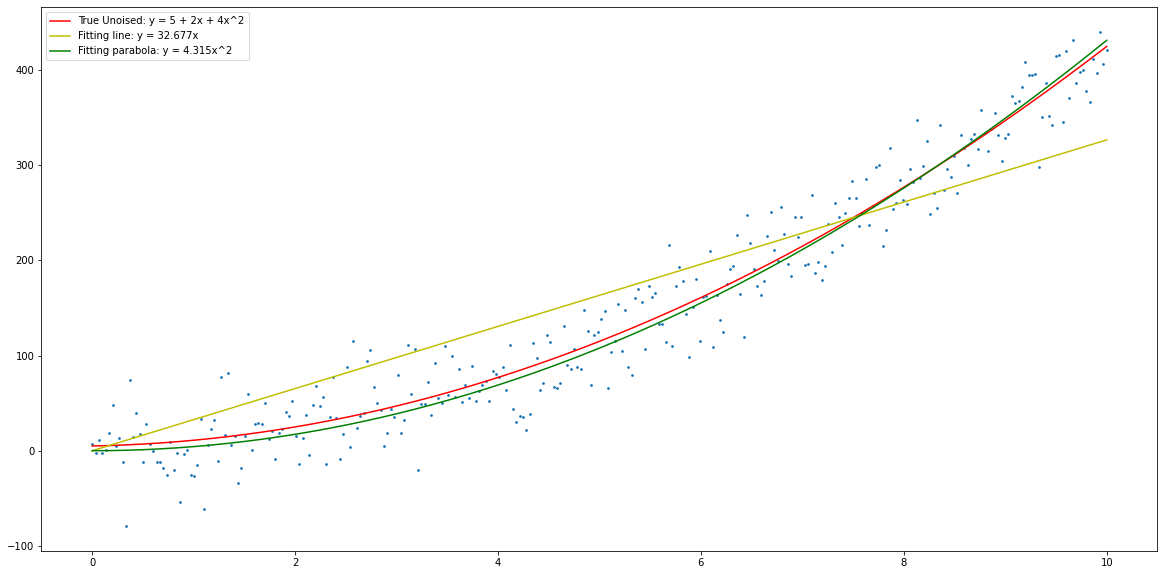

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
poly_func = lambda X, a1, a2, b: a2*X*X + a1 * X + b + np.random.normal(size=X.shape, scale=30)
a1, a2, b = 2, 4, 5
x = np.linspace(0, 10, 300)
y = poly_func(x, a1, a2, b)
plt.scatter(x, y, s=3)

def orth_projection(y, x):
    v = x.reshape(-1, 1).astype(float) # x as column vector
        
    P = v @ np.linalg.inv(v.T @ v) @ v.T  #Projection Matrix over the space generated by x
    Y = P @ y.reshape(-1, 1) #Orthogonally project Y on span(x)
    div = np.divide(Y, v, out=np.zeros_like(Y), where=v!=0) # Get coefficient of the proection such that proj_{span(x)}y = c * x
    non_zero = np.asarray(div).nonzero()[0][0] #Get first non zero entry of the vector
    return div[non_zero][0], Y

c, y0 = orth_projection(y, np.ones(x.shape))
c1, y1  = orth_projection(y, x)
c2, y2 = orth_projection(y, x**2)

Y_fitted =  c2*x**2
Y_true = a2*x**2 + a1 * x + b

plt.plot(x, Y_true, color='r', label=f"True Unoised: y = {round(b, 3)} + {round(a1, 3)}x + {round(a2, 3)}x^2")
plt.plot(x, c1*x, color='y', label=f"Fitting line: y = {round(c1, 3)}x")
plt.plot(x, Y_fitted, color='g', label=f"Fitting parabola: y = {round(c2, 3)}x^2")
plt.legend()


    

Y si quiero ajustar un polinomio? Toca hacer proyección a un subespacio generado por una base. Pero para esto toca ortogonalizar la base, 
proyectar sobre la base ortogonalizada y luego hacer el cambio de base a la original para sacar los coeficientes.

$$LinRegrPol(x, y) = argmin_{C_0, C_1, \dots, C_n} || (C_0 +  C_1 \cdot x + C_2 \cdot x^2 + \dots + C_n \cdot x^n) - y ||_2$$

Entonces  si $B := (1, x, x^2, \dots, x^n)$ forma una base de $span((1, x, x^2, \dots, x^n))$, entonces, $(C_1, \dots, C_n) = [proy_{B}(y)]_B$

(0.0, 3.0)

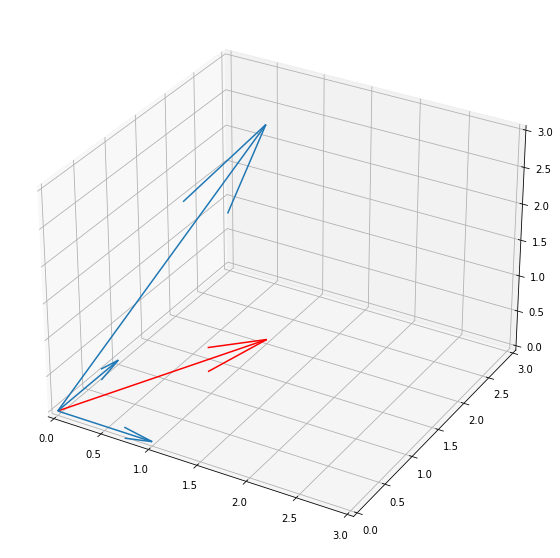

In [83]:
from mpl_toolkits.mplot3d import Axes3D


y = np.array([1, 2, 3]).reshape((-1, 1))
e1 = np.array([1, 0, 0]).reshape((-1, 1))
e2 = np.array([0, 1, 0]).reshape((-1, 1))

proj_y_e1 = orth_projection(y, e1) 
proj_y_e2 = orth_projection(y, e2)
proj_y = proj_y_e1[1] + proj_y_e2[1]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

origin = [0,0,0]

soa = np.array([[*origin, *y.reshape(-1)],
                [*origin, *e1.reshape(-1)],
                [*origin, *e2.reshape(-1)],
                                            ])

proj = np.array([*origin, *proj_y.reshape(-1)])

X, Y, Z, U, V, W = zip(*soa)
ax.quiver(X, Y, Z, U, V, W)
ax.quiver(*proj, color='r')
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])



In [137]:
from scipy.linalg import orth
from numpy.linalg import qr

def project_onto_subspace(B, y):
    """
    `B`: basis for subspace given as column vector in a matrix. B shape (m, n). n beeing dimension of subspace
    `y`: vector to project. Dime of vector should be m
    """
    dim = B.shape[1]
    Q, R = qr(B, mode="complete")
    B_orth = Q[:, :dim]
    P = B_orth @ np.linalg.inv(B_orth.T @ B_orth) @ B_orth.T
    p_y = P @ y.reshape(-1, 1) #Projection of y onto the subspace

    X = np.concatenate((B, Q[:, B.shape[1]:]), axis=1)
    C = np.linalg.solve(X, p_y) #Coefficients for the linear decomposition of y

    return C.reshape(-1)[:dim], p_y


Se crea la función anterior para econtrar la proyección con respecto a una base no necesariamente ortonormal. 
Además, también se calcula la combinación lineal de los elementos de la base dada que generan la proyección con respecto a la base.

(0.0, 3.0)

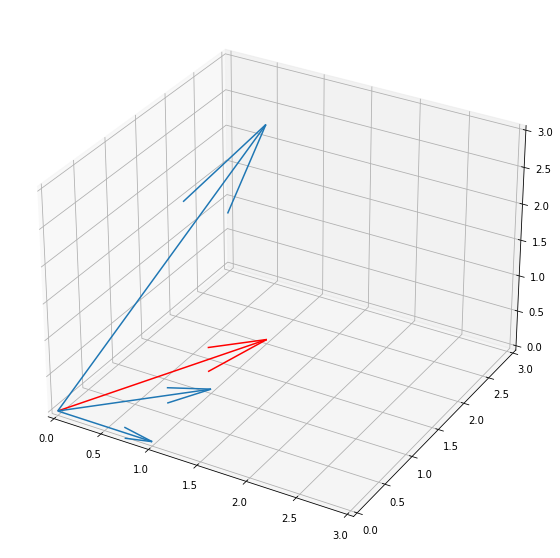

In [140]:

b1 = np.array([1, 0, 0], dtype=float)
b2 = np.array([1, 1, 0], dtype=float)
B = np.array([b1, b2]).T

C, p_y = project_onto_subspace(B, y)
Calc_p_y = C[0] * b1 + C[1] * b2

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

origin = [0,0,0]

soa = np.array([[*origin, *y.reshape(-1)],
                [*origin, *b1.reshape(-1)],
                [*origin, *b2.reshape(-1)],
                                            ])

proj = np.array([*origin, *Calc_p_y.reshape(-1)])

X, Y, Z, U, V, W = zip(*soa)
ax.quiver(X, Y, Z, U, V, W)
ax.quiver(*proj, color='r')
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

Usaremos esta proyección más genérica para aproximar más adecuadamente datos polinomiales

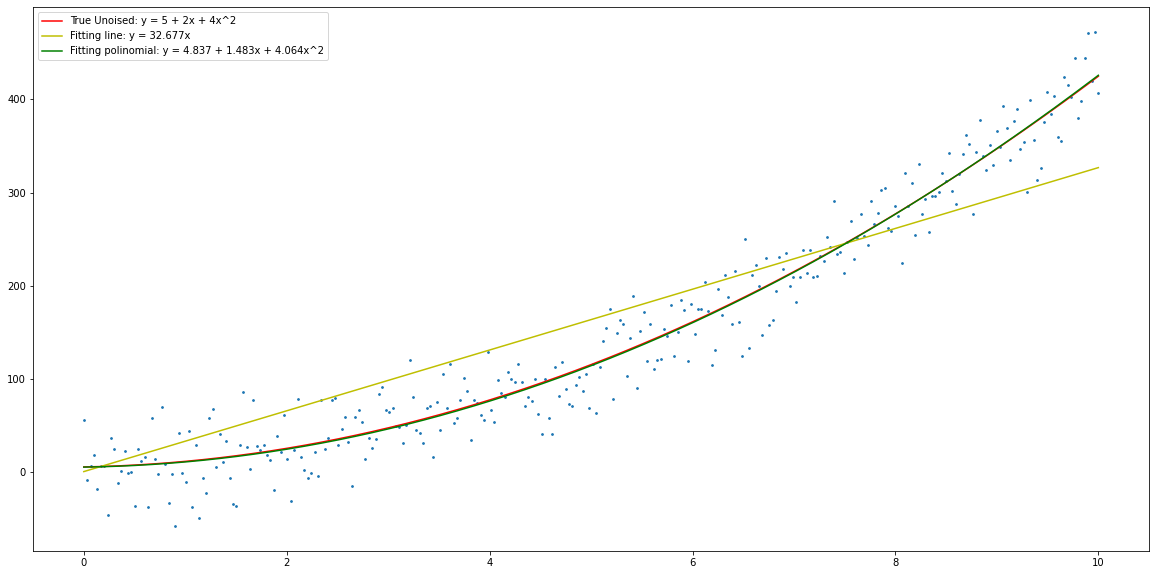

In [160]:
np.random.seed(7)
plt.figure(figsize=(20,10))
poly_func = lambda X, a1, a2, b: a2*X*X + a1 * X + b + np.random.normal(size=X.shape, scale=30)
a1, a2, b = 2, 4, 5
x = np.linspace(0, 10, 300)
y = poly_func(x, a1, a2, b)
plt.scatter(x, y, s=3)

b0, b1, b2 = np.ones(x.shape), x, x**2
B = np.array([b0, b1, b2]).T

C, p_y = project_onto_subspace(B, y)

Y_fitted =  C[0]*b0 + C[1]*b1 + C[2]*b2
Y_true = a2*x**2 + a1 * x + b

plt.plot(x, Y_true, color='r', label=f"True Unoised: y = {round(b, 3)} + {round(a1, 3)}x + {round(a2, 3)}x^2")
plt.plot(x, c1*x, color='y', label=f"Fitting line: y = {round(c1, 3)}x")
plt.plot(x, Y_fitted, color='g', label=f"Fitting polinomial: y = {round(C[0], 3)} + {round(C[1], 3)}x + {round(C[2], 3)}x^2")
plt.legend()

El problema anterior se puede reformular de una forma un poco más conocida. Por ejemplo, si queremos fittear un polinomio en N variables, podemos construir una matriz de tamaño N+1, donde la primera columna es el vector de Unos, la segunda es $x$ y la i-esima, $x^{i-1}$, entonces, queremos encontrar un vector de coeficientes C, tal que:

$$
C := argmin_C || X \cdot C - y||_2
$$

Este es un problema bastante conocido y tiene una solución cerrada. 

$$
C = X^{\textit{(pseudoinverse})} \cdot y
$$

Donde $X^{\textit{(pseudoinverse})}$ es la pseudo inversa o inversa de Moore-Penrose de $X$. En general esta pseudo inversa depende de la naturaleza de $X$, 